In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D1search_results_Election.csv')
df

,user_country,source,content,date
0,NaN,Twitter Web App,In the 2016 Election Trump Ordered his Staff t...,2020-09-29T23:59:59+00:00
1,NaN,Twitter Web App,@CaraKorte @WI_Elections smh just show up ear...,2020-09-29T23:59:58+00:00
2,"Los Angeles, CA",Twitter for Android,@ddoregon2020 @latimes What? The popular vote ...,2020-09-29T23:59:56+00:00
3,New York City / Worldwide,SocialFlow,NEW: Federal appeals court upholds a six-day e...,2020-09-29T23:59:56+00:00
4,NaN,Twitter Web App,BREAKING: Outside advisers to @realDonaldTrump...,2020-09-29T23:59:56+00:00
...,...,...,...,...
1995,Atlanta,Plume for Android,Does anyone doubt she would cancel the electio...,2020-09-29T23:42:21+00:00
1996,boyton beach kutaisi madrid brooyklin,Twitter Web App,Join ABC7NY for Town Hall on what to know befo...,2020-09-29T23:42:20+00:00
1997,"Illinois, USA",Twitter Web App,@notbalin Welcome to the show that never ends....,2020-09-29T23:42:20+00:00
1998,NaN,Twitter for Android,@Peaches_Sabrina @sunriseseachday @Pilot9 @AP ...,2020-09-29T23:42:19+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

65271
['in', 'the', '2016', 'election', 'trump', 'ordered', 'his', 'staff', 'to', 'block', '3.5', 'million', 'black', 'americans', 'from', 'voting', '!', 'black', 'americans', ';']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 182.04%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

27331
['election', 'trump', 'ordered', 'staff', 'block', 'million', 'black', 'americans', 'voting', 'black', 'americans', 'attack', 'racist', 'fraud', 'trump', 'voting', 'site', 'mail', 'votes', 'vote']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@realdonaldtrump', 131),
 ('@joebiden', 57),
 ('@cnn', 15),
 ('@msnbc', 15),
 ('@senatemajldr', 14),
 ('@donaldjtrumpjr', 13),
 ('@ilhan', 13),
 ('@ap', 12),
 ('@dni_ratcliffe', 10),
 ('@kamalaharris', 10),
 ('@marthamaccallum', 10),
 ('@youtube', 10),
 ('@nra', 8),
 ('@potus', 8),
 ('@realanthonyc', 8),
 ('@lindseygrahamsc', 8),
 ('@sencorygardner', 8),
 ('@senschumer', 8),
 ('@abc', 7),
 ('@hillaryclinton', 7)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,NaN,Twitter Web App,In the 2016 Election Trump Ordered his Staff t...,2020-09-29T23:59:59+00:00,Negative
1,NaN,Twitter Web App,@CaraKorte @WI_Elections smh just show up ear...,2020-09-29T23:59:58+00:00,Positive
2,"Los Angeles, CA",Twitter for Android,@ddoregon2020 @latimes What? The popular vote ...,2020-09-29T23:59:56+00:00,Positive
3,New York City / Worldwide,SocialFlow,NEW: Federal appeals court upholds a six-day e...,2020-09-29T23:59:56+00:00,Positive
4,NaN,Twitter Web App,BREAKING: Outside advisers to @realDonaldTrump...,2020-09-29T23:59:56+00:00,Positive
...,...,...,...,...,...
1995,Atlanta,Plume for Android,Does anyone doubt she would cancel the electio...,2020-09-29T23:42:21+00:00,Neutral
1996,boyton beach kutaisi madrid brooyklin,Twitter Web App,Join ABC7NY for Town Hall on what to know befo...,2020-09-29T23:42:20+00:00,Neutral
1997,"Illinois, USA",Twitter Web App,@notbalin Welcome to the show that never ends....,2020-09-29T23:42:20+00:00,Positive
1998,NaN,Twitter for Android,@Peaches_Sabrina @sunriseseachday @Pilot9 @AP ...,2020-09-29T23:42:19+00:00,Neutral


In [11]:
df.sentiment.value_counts()

Positive    934
Neutral     598
Negative    468
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 46.70%
Percentage of neutral tweets: 29.90%
Percentage of negative tweets: 23.40%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

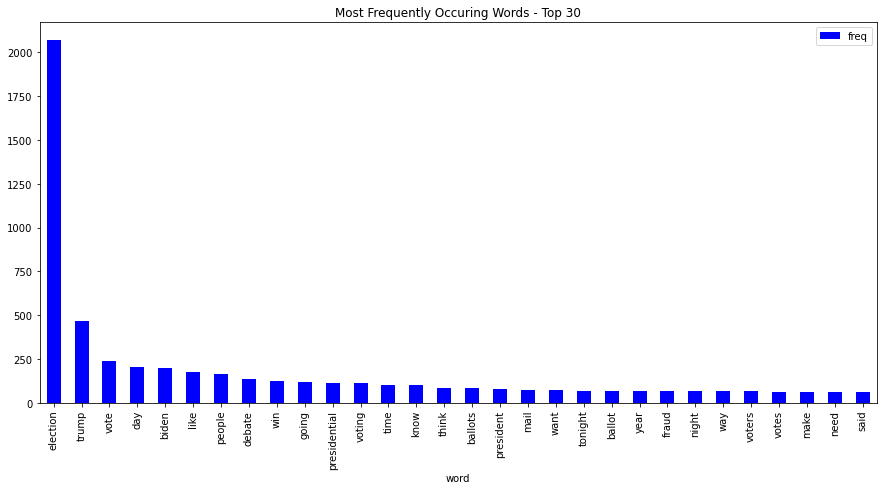

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Debate1')

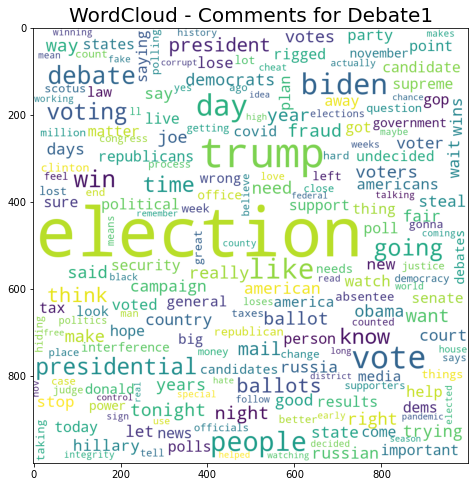

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Debate1", fontsize = 20)

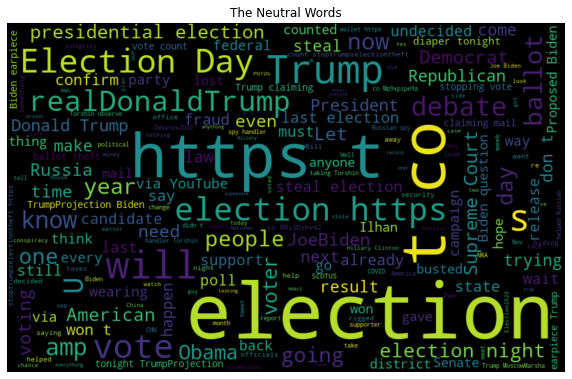

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

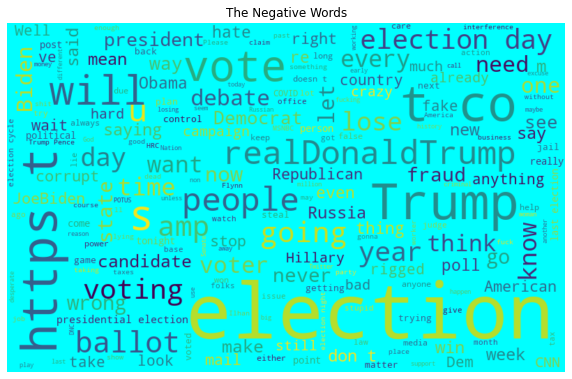

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

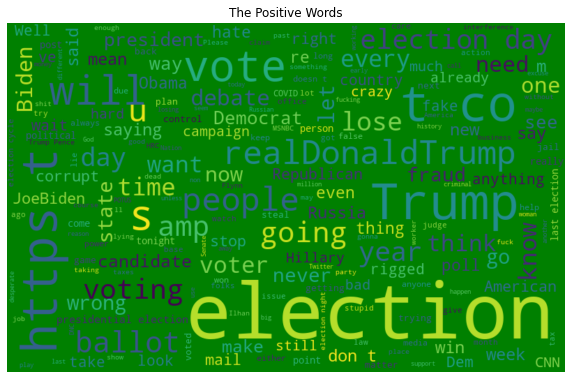

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,In the 2016 Election Trump Ordered his Staff t...,Negative
1,@CaraKorte @WI_Elections smh just show up ear...,Positive
2,@ddoregon2020 @latimes What? The popular vote ...,Positive
3,NEW: Federal appeals court upholds a six-day e...,Positive
4,BREAKING: Outside advisers to @realDonaldTrump...,Positive
...,...,...
1995,Does anyone doubt she would cancel the electio...,Neutral
1996,Join ABC7NY for Town Hall on what to know befo...,Neutral
1997,@notbalin Welcome to the show that never ends....,Positive
1998,@Peaches_Sabrina @sunriseseachday @Pilot9 @AP ...,Neutral


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Negative,in the election trump ordered his staff to blo...
1,Positive,elections smh just show up early in person ffs...
2,Positive,what the popular vote has nothing to do with w...
3,Positive,new federal appeals court upholds a six day ex...
4,Positive,breaking outside advisers to say tonight s deb...
...,...,...
1995,Neutral,does anyone doubt she would cancel the electio...
1996,Neutral,join abc ny for town hall on what to know befo...
1997,Positive,welcome to the show that never ends my first p...
1998,Neutral,sabrina wisconsin law says ballots must be tur...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
1,Positive,elections smh just show up early in person ffs...
2,Positive,what the popular vote has nothing to do with w...
3,Positive,new federal appeals court upholds a six day ex...
4,Positive,breaking outside advisers to say tonight s deb...
5,Positive,i ve got the popcorn ready tell martha to take...
...,...,...
1945,Negative,trump campaign microtargeted black americans d...
1951,Negative,brennan briefed obama in july that russia knew...
1980,Negative,might be a long election week never mind night
1993,Negative,enters debates as the front runner with days t...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
1,1,elections smh just show up early in person ffs...
2,1,what the popular vote has nothing to do with w...
3,1,new federal appeals court upholds a six day ex...
4,1,breaking outside advisers to say tonight s deb...
5,1,i ve got the popcorn ready tell martha to take...
...,...,...
1945,0,trump campaign microtargeted black americans d...
1951,0,brennan briefed obama in july that russia knew...
1980,0,might be a long election week never mind night
1993,0,enters debates as the front runner with days t...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(1051, 2)
(351, 2)


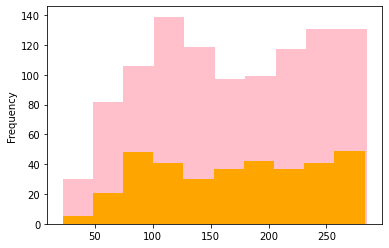

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(426839, 652200)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('pres', 0.6987122297286987),
 ('bank', 0.6942914128303528),
 ('leftist', 0.6697448492050171),
 ('walks', 0.665948748588562),
 ('former', 0.6622464656829834),
 ('brutally', 0.657131552696228),
 ('kick', 0.6564057469367981),
 ('sleepy', 0.6551621556282043),
 ('vice', 0.6506158113479614),
 ('murdered', 0.6498092412948608)]

In [37]:
model_w2v.wv.most_similar(negative = "trum")

[('court', -0.26075851917266846),
 ('supreme', -0.2754518389701843),
 ('needs', -0.2775837779045105),
 ('his', -0.2911537289619446),
 ('days', -0.2998311519622803),
 ('counted', -0.3070390522480011),
 ('at', -0.30979517102241516),
 ('no', -0.3138134181499481),
 ('after', -0.31612879037857056),
 ('before', -0.3214324414730072)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(1051, 500)
(1051,)
(351, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.5327635327635327
F1 score : 0.6419213973799126
[[ 40  84]
 [ 80 147]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9990485252140818
Validation Accuracy : 0.5982905982905983
f1 score : 0.7251461988304094
[[ 24 100]
 [ 41 186]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.5470085470085471
f1 score : 0.6458797327394209
[[ 47  77]
 [ 82 145]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.934348239771646
Validation Accuracy : 0.6495726495726496
f1 score : 0.7860869565217391
[[  2 122]
 [  1 226]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 yes i m sure the democrats who are inventing the rd method to vote unsolicited ballots and all the lockdowns leading to the guarantee it will be relevant are doing it out of the goodness of their hearts not a plan to steal election consider their behavior last years 

First sample after preprocessing: 
 [354   9  63 163   1 115  46  20   1   3  30 103   5  35   1 355   3   1
  12  22  18  20 262  12  58   8   1   8  81  23   4 238   3 193   2  81
  94 125   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
8/8 - 1s - loss: 0.6580 - accuracy: 0.6423 - val_loss: 0.6352 - val_accuracy: 0.6698
Epoch 2/20
8/8 - 1s - loss: 0.6320 - accuracy: 0.6730 - val_loss: 0.6332 - val_accuracy: 0.6698
Epoch 3/20
8/8 - 1s - loss: 0.6267 - accuracy: 0.6730 - val_loss: 0.6331 - val_accuracy: 0.6698
Epoch 4/20
8/8 - 1s - loss: 0.6223 - accuracy: 0.6730 - val_loss: 0.6267 - val_accuracy: 0.6698
Epoch 5/20
8/8 - 1s - loss: 0.6097 - accuracy: 0.6730 - val_loss: 0.6202 - val_accuracy: 0.6698
Epoch 6/20
8/8 - 1s - loss: 0.5952 - accuracy: 0.6730 - val_loss: 0.6078 - val_accuracy: 0.6698
Epoch 7/20
8/8 - 1s - loss: 0.5685 - accuracy: 0.6730 - val_loss: 0.5885 - val_accuracy: 0.6698
Epoch 8/20
8/8 - 1s - loss: 0.5261 - accuracy: 0.6741 - val_loss: 0.5642 - val_accuracy: 0.6981
Epoch 9/20
8/8 - 1s - loss: 0.4704 - accuracy: 0.7513 - val_loss: 0.5410 - val_accuracy: 0.7264
Epoch 10/20
8/8 - 1s - loss: 0.4179 - accuracy: 0.8307 - val_loss: 0.5359 - val_accuracy: 0.6981
Epoch 11/20
8/8 - 1s - loss: 0.3663 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,0,in the election trump ordered his staff to blo...
1,1,elections smh just show up early in person ffs...
2,1,what the popular vote has nothing to do with w...
3,1,new federal appeals court upholds a six day ex...
4,1,breaking outside advisers to say tonight s deb...
...,...,...
1995,-1,does anyone doubt she would cancel the electio...
1996,-1,join abc ny for town hall on what to know befo...
1997,1,welcome to the show that never ends my first p...
1998,-1,sabrina wisconsin law says ballots must be tur...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.9993333333333333
Validation Accuracy : 0.464
F1 score : [0.5        0.2        0.53303965]
[[ 94   8  48]
 [ 48  17  61]
 [ 84  19 121]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9053333333333333
Validation Accuracy : 0.418
f1 score : [0.51235955 0.20952381 0.42318841]
[[114  17  19]
 [ 75  22  29]
 [106  45  73]]


C:\Users\anshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9993333333333333
Validation Accuracy : 0.378
f1 score : [0.4076087  0.25104603 0.42748092]
[[75 32 43]
 [54 30 42]
 [89 51 84]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8453333333333334
Validation Accuracy : 0.492
f1 score : [0.53608247 0.         0.58556701]
[[104   1  45]
 [ 52   0  74]
 [ 82   0 142]]


In [59]:
X_Train

array([[1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['c have you heard anything about it no me either will it get covered at all before the election', 'it s absolutely not common for a political campaign to instruct local election officials on which state rules to follow or not follow freaking amazing', 'coming from someone who rigged an election to win lockherup cashforballots', 'who gives a fuck they working on this shit since long before the election why suddenly this comes out again like a big surprise', 'no it was designed to keep a minority rule name one other election that s won by a minority of voters governors senators even local councilman are elected by popular vote', 'still on the middle of a pandemic and a nasty election cycle and on the heels of raising the monthly subscription price by has snuck it out there that regional fox sports networks are being removed again monthly price however is not being reduced', 'tripp the hippie or my government name landon campbell now to also share a l

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.5572 - accuracy: 0.2370 - val_loss: 0.7545 - val_accuracy: 0.2600
Epoch 2/20
11/11 - 2s - loss: 0.4414 - accuracy: 0.2244 - val_loss: 0.7580 - val_accuracy: 0.2600
Epoch 3/20
11/11 - 2s - loss: 0.4177 - accuracy: 0.2244 - val_loss: 0.7425 - val_accuracy: 0.2600
Epoch 4/20
11/11 - 2s - loss: 0.3977 - accuracy: 0.2244 - val_loss: 0.7256 - val_accuracy: 0.2600
Epoch 5/20
11/11 - 2s - loss: 0.3438 - accuracy: 0.2244 - val_loss: 0.6795 - val_accuracy: 0.2600
Epoch 6/20
11/11 - 2s - loss: 0.2000 - accuracy: 0.2244 - val_loss: 0.5792 - val_accuracy: 0.2600
Epoch 7/20
11/11 - 2s - loss: -2.0894e-01 - accuracy: 0.2370 - val_loss: 0.4454 - val_accuracy: 0.3333
Epoch 8/20
11/11 - 2s - loss: -1.1621e+00 - accuracy: 0.3111 - val_loss: 0.6125 - val_accuracy: 0.3667
Epoch 9/20
11/11 - 2s - loss: -3.2913e+00 - accuracy: 0.3511 - val_loss: 0.2197 - val_accuracy: 0.4733
Epoch 10/20
11/11 - 2s - loss: -7.7724e+00 - accuracy: 0.3630 - val_loss: 0.5794 - val_accuracy: 0.4667